# Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
x=6*np.random.rand(200,1)
y=0.8*x**2+0.9*x+np.random.randn(200,1)

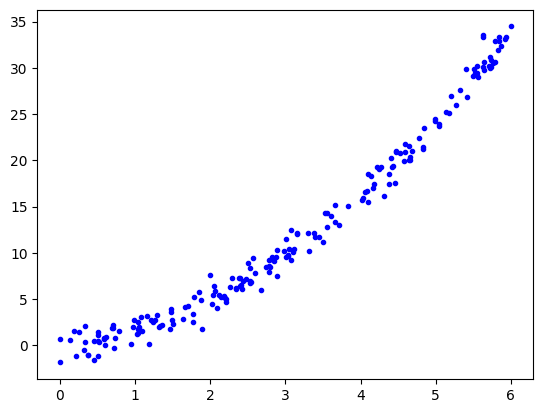

In [8]:
plt.plot(x,y,'b.')

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=lr.predict(x_test)
r2_score(y_pred,y_test)

0.9265026236877274

In [12]:
poly=PolynomialFeatures(degree=2)

In [21]:
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)

In [22]:
lr=LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(x_test_trans)
r2_score(y_pred,y_test)

0.9884422623748322

In [33]:
def polynomial_regression(degree):
    x_new = np.linspace(-3, 3, 100).reshape(100, 1)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig, "r", label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()


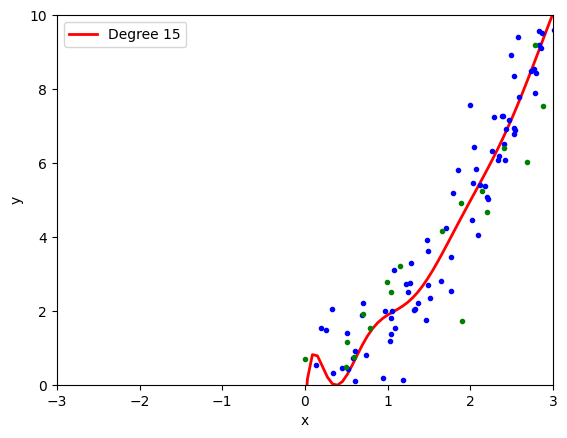

In [34]:
polynomial_regression(15)